<a href="https://colab.research.google.com/github/varun-dubagunta/Projects/blob/main/scraper_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests



In [ ]:
'''Practicing web scraping with BeautifulSoup 4 and running basic linear regression on companies and revenue'''

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [ ]:
table_arr = soup.find_all('table')

print(table_arr[0])

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [ ]:

revenue_table = table_arr[0]
header_tags = revenue_table.find_all('th')

table_headers = [header.text.strip() for header in header_tags]
print(revenue_table)



<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=table_headers)
column_data = revenue_table.find_all('tr')

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    df.loc[len(df)] = individual_row_data
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

new_df = df[['Rank', 'Revenue (USD millions)', 'Revenue growth', 'Employees']].copy()
new_df #have to remove commas and % signs to produce relations

new_df['Revenue (USD millions)'] = new_df['Revenue (USD millions)'].str.replace(',', '').astype(float)
new_df['Revenue growth'] = new_df['Revenue growth'].str.replace('%', '').astype(float)
new_df['Employees'] = new_df['Employees'].str.replace(',', '').astype(float)

new_df

,Rank,Revenue (USD millions),Revenue growth,Employees
0,1,648125.0,6.0,2100000.0
1,2,574785.0,11.9,1525000.0
2,3,383482.0,-2.8,161000.0
3,4,371622.0,14.6,440000.0
4,5,364482.0,20.7,396500.0
...,...,...,...,...
95,96,45735.0,11.8,16023.0
96,97,45590.0,-4.6,10609.0
97,98,45006.0,-2.5,34100.0
98,99,44622.0,-21.6,35900.0


,Rank,Revenue (USD millions),Revenue growth,Employees
Rank,1.000000,-0.780073,-0.184533,-0.379166
Revenue (USD millions),-0.780073,1.000000,0.092598,0.699229
Revenue growth,-0.184533,0.092598,1.000000,0.052155
Employees,-0.379166,0.699229,0.052155,1.000000


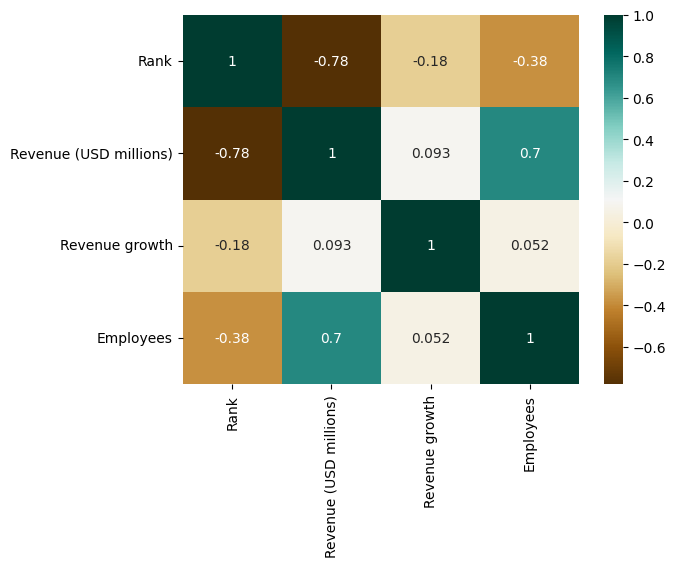

In [ ]:
correlation = new_df.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)
correlation

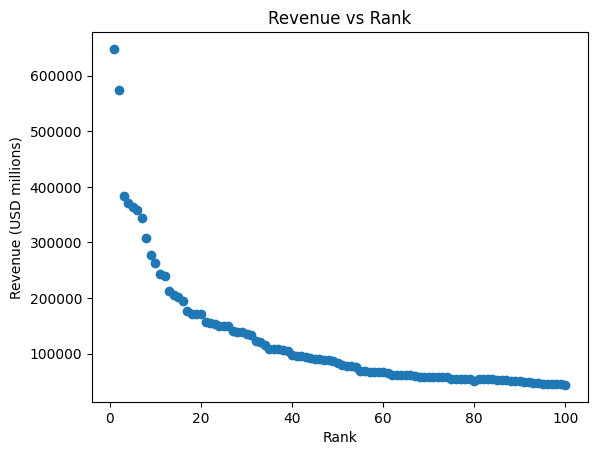

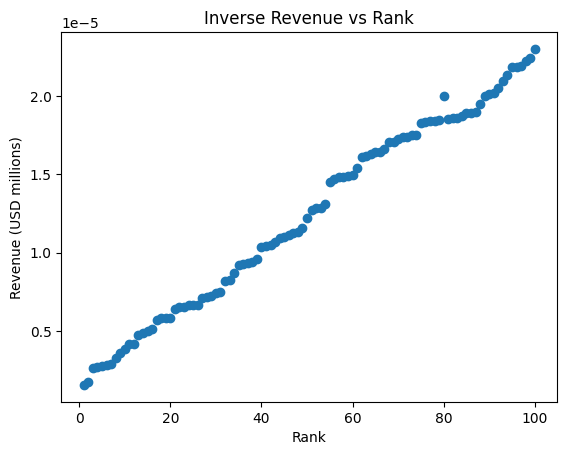

In [ ]:
import numpy as np
arr = np.linspace(1, 100, num = 100)
plt.scatter(arr, new_df['Revenue (USD millions)'] )

plt.title('Revenue vs Rank')
plt.ylabel('Revenue (USD millions)')
plt.xlabel('Rank')
plt.show()

plt.scatter(arr, 1/new_df['Revenue (USD millions)'] )

plt.title('Inverse Revenue vs Rank')
plt.ylabel('Revenue (USD millions)')
plt.xlabel('Rank')
plt.show()


